In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plantvillage-dataset/segmented/Tomato___Late_blight/081d1e25-3f06-46a1-95ef-d10a62faa80f___GHLB2 Leaf 8600_final_masked.jpg
/kaggle/input/plantvillage-dataset/segmented/Tomato___Late_blight/e6703c22-86f7-4bdf-9733-072180761976___RS_Late.B 5522_final_masked.jpg
/kaggle/input/plantvillage-dataset/segmented/Tomato___Late_blight/9f946f43-424a-41be-9f91-b14fa3f2b37a___GHLB2 Leaf 8892_final_masked.jpg
/kaggle/input/plantvillage-dataset/segmented/Tomato___Late_blight/dfc45d56-7ecb-46a5-b9da-9297df393f7b___RS_Late.B 6928_final_masked.jpg
/kaggle/input/plantvillage-dataset/segmented/Tomato___Late_blight/84b7d3ab-56ae-4eef-a852-7b32f3ef0160___GHLB2 Leaf 150_final_masked.jpg
/kaggle/input/plantvillage-dataset/segmented/Tomato___Late_blight/a5fe1111-38b0-4206-9ac7-3eec701beb79___GHLB2 Leaf 8868_final_masked.jpg
/kaggle/input/plantvillage-dataset/segmented/Tomato___Late_blight/e5b81597-d794-40e5-8f14-0b5792c4a680___RS_Late.B 6757_final_masked.jpg
/kaggle/input/plantvillage-dataset/seg

In [3]:
import os

DATASET_DIR = "/kaggle/input/plantvillage-dataset"

print(os.listdir(DATASET_DIR))

print(len(os.listdir(os.path.join(DATASET_DIR, "segmented"))))
print(os.listdir(os.path.join(DATASET_DIR, "segmented"))[:5])

print(len(os.listdir(os.path.join(DATASET_DIR, "color"))))
print(os.listdir(os.path.join(DATASET_DIR, "color"))[:5])

print(len(os.listdir(os.path.join(DATASET_DIR, "grayscale"))))
print(os.listdir(os.path.join(DATASET_DIR, "grayscale"))[:5])


['segmented', 'grayscale', 'plantvillage dataset', 'color']
38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']
38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']
38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']


**Seeding for reproducibility**

In [4]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

2025-12-17 19:07:55.571200: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765998475.738789      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765998475.787819      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

**Importing the dependencies**

In [5]:
import tensorflow as tf
from tensorflow.keras import mixed_precision

tf.keras.backend.clear_session()
mixed_precision.set_global_policy("mixed_float16")

IMG_SIZE = (224, 224)
BATCH_SIZE = 8     # 🚨 critical
EPOCHS = 20


In [6]:
import os
import json
from zipfile import ZipFile

from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [7]:
print(len(os.listdir("/kaggle/input/plantvillage-dataset/color/Grape___healthy")))
print(os.listdir("/kaggle/input/plantvillage-dataset/color/Grape___healthy")[:5])

423
['71af6c2b-b3ed-4629-8aaa-7b60187caee1___Mt.N.V_HL 9069.JPG', '244804b5-05e2-4372-a376-36a0655aff41___Mt.N.V_HL 6121.JPG', '4b266fb8-a762-4073-a9e2-25a3861115c4___Mt.N.V_HL 6152.JPG', '4bd0c235-94b2-4d5d-a76e-58df595e7802___Mt.N.V_HL 6032.JPG', '12331981-d038-4eb0-a1c6-64b27f226cab___Mt.N.V_HL 6106.JPG']


**Data Preprocessing**

(256, 256, 3)


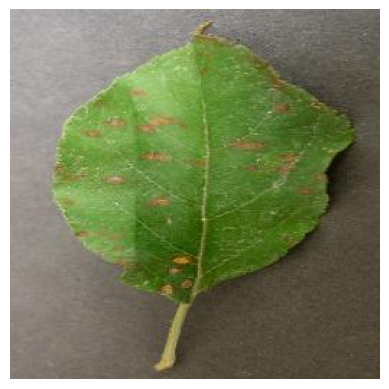

In [8]:
image_path = '/kaggle/input/plantvillage-dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [9]:
image_path = '/kaggle/input/plantvillage-dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)
     

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [8]:
# import tensorflow as tf

# IMG_SIZE = 224
# BATCH_SIZE = 8
# base_dir = '/kaggle/input/plantvillage-dataset/color'
# train_ds = tf.keras.utils.image_dataset_from_directory(
#     base_dir,
#     image_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=BATCH_SIZE,
#     label_mode="categorical"
# )

# # Normalize
# normalization_layer = tf.keras.layers.Rescaling(1./255)

# train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))


Found 54305 files belonging to 38 classes.


I0000 00:00:1765995726.996036     763 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [10]:

# Image Parameters
img_size = 224
batch_size = 32

**TRAIN and VALIDATION datasets**

In [11]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [14]:
# Train Generator
base_dir = '/kaggle/input/plantvillage-dataset/color'
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [15]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Network**

In [16]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1765998554.324408      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [17]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [19]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)
  

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1765998557.731414     110 service.cc:148] XLA service 0x7eddc8004700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765998557.732344     110 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1765998558.041780     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/1358 ━━━━━━━━━━━━━━━━━━━━ 2:28:04 7s/step - accuracy: 0.0000e+00 - loss: 3.6691

I0000 00:00:1765998562.493106     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 283s 204ms/step - accuracy: 0.5826 - loss: 2.3425 - val_accuracy: 0.8579 - val_loss: 0.4503
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 105s 77ms/step - accuracy: 0.9203 - loss: 0.2562 - val_accuracy: 0.8758 - val_loss: 0.3912
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 95s 70ms/step - accuracy: 0.9644 - loss: 0.1114 - val_accuracy: 0.8852 - val_loss: 0.4571
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 95s 70ms/step - accuracy: 0.9781 - loss: 0.0767 - val_accuracy: 0.8554 - val_loss: 0.5694
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 99s 73ms/step - accuracy: 0.9832 - loss: 0.0535 - val_accuracy: 0.8913 - val_loss: 0.5129


**Model Evaluation**

In [20]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.8959 - loss: 0.4863
Validation Accuracy: 89.14%


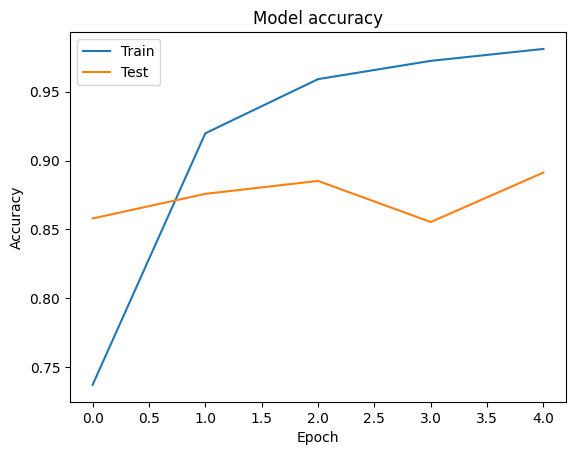

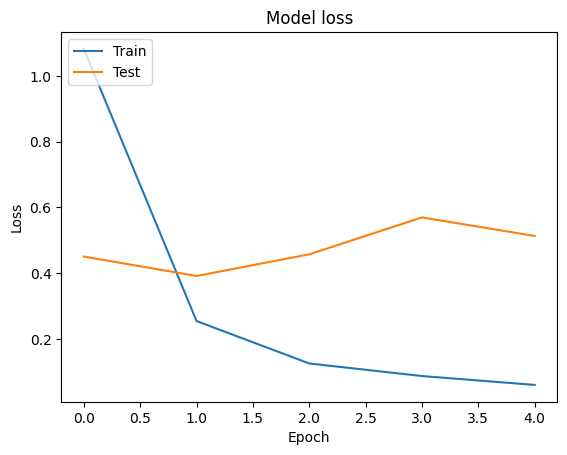

In [21]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [22]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [23]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [24]:
class_indices
     

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [25]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [26]:
# Example Usage
image_path = '/kaggle/input/testset/test_apple_black_rot.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step
Predicted Class Name: Apple___Black_rot


**Save the model to local**

In [27]:
model.save('/kaggle/working/plant_disease_prediction_model.h5')  # save in working directory
